# Project Overview 

## 1 - Collect Data 
- #### Collect Laptop main data 
- #### Collect Laptop details data
- #### Merge Collected data
- #### Remove duplicated rows 
- #### Save data into csv file 

## 2 - Take a look at data :
- #### Check shape of data 
- #### Check is there any null value
- #### Check data types
- #### Check number of unique values in each column

## 3 - Cleaning data 
- #### Convert brands name from persian to english
- #### Convert ram from persian to english digits
- #### Clean and convert internal storage to english
- #### Convert and clean internal storage to english
- #### Convert and clean laptops screen size
- #### Clean laptops resolution

## 4 - EDA 
- #### Laptops price distribution
- #### Number of laptops of each brand
- #### Number of cpu of each cpu manufacturer
- #### Number of laptops for each ram group 
- #### Number of laptops for each ram type group
- #### Number of laptops with diffrent internal storage
- #### Number of laptops for each internal storage group
- #### Number of laptops with diffrent screen sizes
- #### Number of laptop with diffrent screen resolution


## 5 - Feature Engineering
- #### Remove outliers base on laptops price using z score
- #### Convert screen resolution to number
- #### Extract Gaming brands from title (asus rog , acer nitro ...)
- #### Remove brand with only one laptop
- #### Extract clean gpu model from gpu model column
- #### Remove laptops with only less than 3 model gpu
- #### Label endcoding cleand gpu models
- #### Convert internal storage from tb and gb to mg
- #### Label encoding internal storage type
- #### Convert ram from str to int
- #### Extract port count
- #### Label encoding ram type
- #### Label encoding cpu series
- #### One hot encoding brand - cpu manufacturer - gpu manufacturer (nominal categorical variables)


## 6 - Feature Selection
- #### Check correlation
- #### Mutual information regression

## 7 - Model training  


## 9 - Cross validation

## 10 - Save model

In [112]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import pandas as pd
import numpy as np
import re


# Model Building 
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



# Feature Selection
from sklearn.feature_selection import mutual_info_regression


# Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV



# Evalute model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import ShuffleSplit


# Data Visualisation
import matplotlib.pyplot as plt
from termcolor import cprint
import seaborn as sns
import warnings


# Data Collecting
import requests


# Save model 
import pickle


sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline

## 1 - Collect Data 
- #### Collect Laptop main data 
- #### Collect Laptop details data
- #### Merge Collected data
- #### Remove duplicated rows 
- #### Save data into csv file 

### Collect Laptop main data

In [ ]:
product_lists = []

# Collect laptop from scrolling page
for page_number in range(1,37):
    url = f"https://api.digikala.com/v1/categories/notebook-netbook-ultrabook/search/?has_selling_stock=1&q=%D9%84%D9%BE%20%D8%AA%D8%A7%D9%BE&page={page_number}"

    payload={}
    headers = {
      'authority': '',
      'accept': '',
      'accept-language': '',
      'cookie': '',
      'origin': '',
      'referer': '',
      'sec-ch-ua': '""',
      'sec-ch-ua-mobile': '',
      'sec-ch-ua-platform': '""',
      'sec-fetch-dest': '',
      'sec-fetch-mode': '',
      'sec-fetch-site': '',
      'user-agent': '',
      'x-web-client': '',
      'x-web-optimize-response': ''
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    data = response.json()
    for res in data['data']['products']:
        product_data = {
                        'id':res['id'],
                        'title_fa':res['title_fa'],
                        'title_en':res['title_en'],
                        'price':res['default_variant']['price']['selling_price'],
                        'image_url':res['images']['main']['url'][0],
                        'brand':res['data_layer']['brand']
                       }
        product_lists.append(product_data)       

        
df_products = pd.DataFrame(product_lists)

In [ ]:
df_products.head()

### Collect Laptop details data

In [ ]:
laptop_details_list = []


# Collect data from details page
for pr_id in df_products['id']:
    url = f"https://api.digikala.com/v1/product/{pr_id}/"
    payload={}
    headers = {
      'authority': '',
      'accept': '',
      'accept-language': '',
      'cookie': '',
      'origin': '',
      'referer': '',
      'sec-ch-ua': '""',
      'sec-ch-ua-mobile': '',
      'sec-ch-ua-platform': '""',
      'sec-fetch-dest': '',
      'sec-fetch-mode': '',
      'sec-fetch-site': '',
      'user-agent': '',
      'x-web-client': '',
      'x-web-optimize-response': ''
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    res = response.json()['data']['product']['specifications'][0]['attributes']
    for i in res:
        if i['title'] == "سازنده پردازنده":
            cpu_manufacturer = i['values'][0]
        if i['title'] == "سری پردازنده":
            cpu_series = i['values'][0]      
        if i['title'] == "مدل پردازنده":
            cpu_model = i['values'][0] 
        if i['title'] == "ظرفیت حافظه RAM":
            ram = i['values'][0] 
        if i['title'] == "نوع حافظه RAM":
            ram_type = i['values'][0] 
        if i['title'] == "ظرفیت حافظه داخلی":
            internal_storage = i['values'][0]     
        if i['title'] == "نوع حافظه داخلی":
            internal_storagetype = i['values'][0]     
        if i['title'] == "سازنده پردازنده گرافیکی":
            gpu_manufacturer = i['values'][0] 
        if i['title'] == "مدل پردازنده گرافیکی":
            gpu_model = i['values'][0]
        if i['title'] == "درگاه\u200cهای ارتباطی":
            ports = i['values'] 
        if i['title'] == "اندازه صفحه نمایش":
            screen_size = i['values'][0]  
        if i['title'] == "دقت صفحه نمایش":
            screen_resolution = i['values'][0] 
    try :
        laptop_de_data = {
                'id':pr_id,
                'cpu manufacturer':cpu_manufacturer,
                'cpu series':cpu_series,
                'cpu model':cpu_model,
                'ram':ram,
                'ram type':ram_type,
                'internal storage':internal_storage,
                'internal storage type':internal_storagetype,
                'gpu manufacturer':gpu_manufacturer,
                'gpu model':gpu_model,
                'screen size':screen_size,
                'screen resolution':screen_resolution,
                'ports':','.join(ports),
        }
        laptop_details_list.append(laptop_de_data) 
    except :
         pass
df_laptop_details = pd.DataFrame(laptop_details_list)

In [ ]:
df_laptop_details.head()

### Merge Collected data

In [ ]:
df_final = pd.merge(df_products, df_laptop_details, on='id')

In [ ]:
df_final.shape

### Remove duplicated rows

In [ ]:
df_final = df_final.drop_duplicates(subset='id',keep='first')

In [ ]:
df_final.reset_index(drop=True, inplace=True)

### Save data into csv

In [ ]:
df_final.to_csv('laptopsdata_digikala.csv',index=False)

In [ ]:
df_final.head()

In [ ]:
df_final['brand'].value_counts()

## 2 - Take a look at data :
- #### Check shape of data 
- #### Check is there any null value
- #### Check data types
- #### Check number of unique values in each column

In [224]:
df = pd.read_csv('laptopsdata_digikala.csv')

In [225]:
df.head(5)

,id,title_fa,title_en,price,image_url,brand,cpu manufacturer,cpu series,cpu model,ram,ram type,internal storage,internal storage type,gpu manufacturer,gpu model,screen size,screen resolution,ports
0,9467837,لپ تاپ 14.2 اینچی اپل مدل MacBook Pro Z15H0018...,Apple MacBook Pro Z15H00185 M1 Max 2021 14.2 ...,1499000000,https://dkstatics-public.digikala.com/digikala...,اپل,Apple,M1,M1 Max,32 گیگابایت,Unified,دو ترابایت,SSD,Apple,Apple M1 Max با پردازنده گرافیکی 32 هسته ای,14.2 اینچ,3024x1964,"Wi-Fi ,شیار کارت حافظه ,HDMI ,Display Port ,Bl..."
1,7158254,لپ تاپ 15.6 اینچی ایسوس مدل TUF Gaming F15 FX5...,Asus TUF Gaming F15 FX506LH-BA 15.6 Inch laptop,267000000,https://dkstatics-public.digikala.com/digikala...,ایسوس,Intel,Core i5,10300H,16 گیگابایت,DDR4,512 گیگابایت,SSD,NVIDIA,GEFORCE GTX1650 GDDR6 128Bit,15.6 اینچ,1080 × 1920 پیکسل - Full HD,"LAN ,Wi-Fi ,شیار کارت حافظه ,HDMI ,Bluetooth ,..."
2,3735138,لپ تاپ 13 اینچی اپل مدل MacBook Air MGN63 2020,Apple MacBook Air MGN63 2020 - 13 inch Laptop,335900000,https://dkstatics-public.digikala.com/digikala...,اپل,Apple,M1,Apple M1 chip,هشت گیگابایت,Unified,256 گیگابایت,SSD,Apple,7core Apple-designed integrated GPU,13.3 اینچ,QHD|2560x1600,USB 4.0
3,7301038,لپ تاپ 14 اینچی ایسوس مدل R465FA-EB028,Asus R465FA-EB028 14 inch Laptop,99000000,https://dkstatics-public.digikala.com/digikala...,ایسوس,Intel,Core i3,10110U,4 گیگابایت,DDR4,یک ترابایت,هارددیسک,Intel,Intel HD Graphics 520,14 اینچ,1080 × 1920 پیکسل - Full HD,"USB ,Wi-Fi ,HDMI ,Bluetooth"
4,7225177,لپ تاپ 15.6 اینچی لنوو مدل ideapad 3 15ITL6,LENOVO ideapad 3 15ITL6 15.6 inch laptop,165900000,https://dkstatics-public.digikala.com/digikala...,لنوو,Intel,Core i5,1135G7,هشت گیگابایت,DDR4,یک ترابایت,هارددیسک,NVIDIA,MX350,15.6 اینچ,1080 × 1920 پیکسل - Full HD,"Wi-Fi ,HDMI"


### Check shape of data 

In [226]:
df.shape

(609, 18)

### Check is there any null value

In [227]:
df.isnull().sum()

id                       0
title_fa                 0
title_en                 3
price                    0
image_url                0
brand                    0
cpu manufacturer         0
cpu series               0
cpu model                0
ram                      0
ram type                 0
internal storage         0
internal storage type    0
gpu manufacturer         0
gpu model                0
screen size              0
screen resolution        0
ports                    0
dtype: int64

### Check data types

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     609 non-null    int64 
 1   title_fa               609 non-null    object
 2   title_en               606 non-null    object
 3   price                  609 non-null    int64 
 4   image_url              609 non-null    object
 5   brand                  609 non-null    object
 6   cpu manufacturer       609 non-null    object
 7   cpu series             609 non-null    object
 8   cpu model              609 non-null    object
 9   ram                    609 non-null    object
 10  ram type               609 non-null    object
 11  internal storage       609 non-null    object
 12  internal storage type  609 non-null    object
 13  gpu manufacturer       609 non-null    object
 14  gpu model              609 non-null    object
 15  screen size            

### Check number of unique values in each column

In [229]:
df.nunique()

id                       609
title_fa                 607
title_en                 603
price                    516
image_url                603
brand                     14
cpu manufacturer           4
cpu series                14
cpu model                104
ram                       10
ram type                   6
internal storage          13
internal storage type      4
gpu manufacturer           4
gpu model                220
screen size               16
screen resolution         19
ports                    170
dtype: int64

## 3 - Cleaning data 
- #### Convert brands name from persian to english
- #### Convert ram from persian to english digits
- #### Clean and convert internal storage to english
- #### Convert and clean internal storage to english
- #### Convert and clean laptops screen size
- #### Clean laptops resolution

### Convert brands name from persian to english 

In [230]:
def convert_brand(brand):
    """
    This function will convert laptop brands from persian (farsi) into english
    
    Note : I also converted acer predator to acer and brands with one laptop to other
    
    Parms :
    
    brand : brand of the laptop manufacturer in persian
    
    Returns :
    Converted laptop brand  
    """
    if brand == "لنوو":
        brand_name = "lenovo"
    elif brand == "ایسوس":
        brand_name = "Asus"
    elif brand == "اچ‌پی":
        brand_name = "HP"
    elif brand == "ام اس آی":
        brand_name = "MSI"
    elif brand == "اپل":
        brand_name = "Apple"
    elif brand == "دل":
        brand_name = "Dell"
    elif brand == "اپل":
        brand_name = "Apple"
    elif brand == "ایسر":
        brand_name = "Acer"
    elif brand == "مایکروسافت":
        brand_name = "Microsoft"
    elif brand == "ایسر پریدیتور":
        brand_name = "Acer"
    else : 
        brand_name = "Other"
    return brand_name

In [231]:
df['brand'] = df['brand'].apply(lambda x :convert_brand(x))

In [232]:
df['brand'].value_counts()

lenovo       211
Asus         209
HP            77
MSI           31
Apple         26
Acer          21
Dell          20
Microsoft      9
Other          5
Name: brand, dtype: int64

### Convert ram from persian to english digits

In [233]:
df['ram'].unique()[2]

'هشت گیگابایت '

In [234]:
df['ram'].value_counts()

16 گیگابایت       207
8 گیگابایت        145
هشت گیگابایت       78
12 گیگابایت        48
32 گیگابایت        42
4 گیگابایت         41
چهار گیگابایت      34
20 گیگابایت         7
24 گیگابایت         5
64 گیگابایت         2
Name: ram, dtype: int64

In [235]:
df['ram'] = df['ram'].apply(lambda x : x.replace("گیگابایت", "gb"))

In [236]:
ram_dictionary = {'چهار gb ':'4 gb' , 'هشت gb ':'8 gb'}

df = df.replace({'ram':ram_dictionary})

In [237]:
df['ram'] = df['ram'].apply(lambda x : x.strip())

In [238]:
df['ram'].value_counts()

8 gb     223
16 gb    207
4 gb      75
12 gb     48
32 gb     42
20 gb      7
24 gb      5
64 gb      2
Name: ram, dtype: int64

### Clean and convert internal storage to english

In [239]:
df['internal storage'].value_counts()

یک ترابایت                    238
512 گیگابایت                  188
256 گیگابایت                   59
یک ترابایت و 256 گیگابایت      55
یک ترابایت و 128 گیگابایت      24
دو ترابایت                     20
یک ترابایت و 512 گیگابایت      11
128 گیگابایت                    9
یک ترابایت و 250 گیگابایت       1
500 گیگابایت                    1
250 گیگابایت                    1
یک ترابایت و 500 گیگابایت       1
یک ترابایت و 120 گیگابایت       1
Name: internal storage, dtype: int64

In [240]:
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("ترابایت", "tb"))
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("گیگابایت", "gb"))
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("دو", 
                                                                           "2"))
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("دو", 
                                                                           "2"))
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("و", 
                                                                           ""))
df['internal storage'] = df['internal storage'].apply(lambda x : x.replace("یک",
                                                                           "1"))

In [241]:
def extract_tb_is(ins):
    number_list = re.findall(r'\d+', ins)
    if len(number_list) ==2:
        ints=number_list[0]+'.'+number_list[1]+' tb'
    else :
        ints=ins
    return ints

In [242]:
df['internal storage'] = df['internal storage'].apply(lambda x : extract_tb_is(x))

In [243]:
df['internal storage'] = df['internal storage'].apply(lambda x : x.strip())

In [244]:
df['internal storage'].value_counts()

1 tb        238
512 gb      188
256 gb       59
1.256 tb     55
1.128 tb     24
2 tb         20
1.512 tb     11
128 gb        9
500 gb        1
1.500 tb      1
1.250 tb      1
1.120 tb      1
250 gb        1
Name: internal storage, dtype: int64

### Convert and clean internal storage to english

In [245]:
df['internal storage type'].value_counts()

SSD                   436
هیبریدی                82
هارددیسک               60
حافظه‌های هیبریدی      31
Name: internal storage type, dtype: int64

In [246]:
df['internal storage type'] = df['internal storage type'].apply(lambda x : x.strip())

In [247]:
is_dict = {'هیبریدی':'Hybrid','هارددیسک':'HHD','حافظه‌های هیبریدی':'Hybrid'}
df = df.replace({'internal storage type':is_dict})

In [248]:
df['internal storage type'].value_counts()

SSD       436
Hybrid    113
HHD        60
Name: internal storage type, dtype: int64

### Convert and clean laptops screen size

In [249]:
df['screen size'].value_counts()

15.6 اینچ     420
14 اینچ        60
17.3 اینچ      32
13.3 اینچ      26
16.1 اینچ      16
16 اینچ        16
11.6 اینچ       7
13.6 اینچ       6
13.5 اینچ       6
14.2 اینچ       5
13.4 اینچ       4
14.1 اینچ       3
15.0 اینچ       3
12.4 اینچ       2
16.2 اینچ       2
14.4 اینچ       1
Name: screen size, dtype: int64

In [250]:
df['screen size'] = df['screen size'].apply(lambda x : x.replace("اینچ", ""))
df['screen size'] = df['screen size'].apply(lambda x : x.strip())
df['screen size'] = df['screen size'].apply(lambda x : int(x.split('.')[0]))

In [251]:
df['screen size']

0      14
1      15
2      13
3      14
4      15
       ..
604    15
605    15
606    15
607    15
608    15
Name: screen size, Length: 609, dtype: int64

### Clean laptops resolution

In [252]:
df['screen resolution'].value_counts()

1080 × 1920 پیکسل - Full HD     361
Full HD| 1920 x1080              95
HD|1366x768                      54
QHD|2560x1600                    25
QHD|2560x1440                    18
768 × 1366 پیکسل                 15
WUXGA|1920x1200                   7
2560x1664                         6
3024x1964                         5
4k|3840x2400                      5
پیکسل 2256x1504                   4
2K|2560x1440                      3
پیکسل 2880x1800                   3
3456x2234                         2
1024×1536 پیکسل                   2
پیکسل 3240x2160                   1
UHD|3840x2160                     1
پیکسل 3000x2000                   1
2400x1600                         1
Name: screen resolution, dtype: int64

In [253]:
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace("پیکسل", ""))
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.strip())
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace(" × ", "X"))
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace(" x", "X"))
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace("x", "X"))
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace("×", "X"))
df['screen resolution'] = df['screen resolution'].apply(lambda x : x.replace("|", " "))
df['screen resolution'] = df['screen resolution'].apply(lambda x : re.findall(r'[0-9]+X[0-9]+',x)[0])

In [254]:
df['screen resolution'].value_counts()

1080X1920    361
1920X1080     95
1366X768      54
2560X1600     25
2560X1440     21
768X1366      15
1920X1200      7
2560X1664      6
3024X1964      5
3840X2400      5
2256X1504      4
2880X1800      3
3456X2234      2
1024X1536      2
3000X2000      1
3240X2160      1
2400X1600      1
3840X2160      1
Name: screen resolution, dtype: int64

## 4 - EDA 
- #### Laptops price distribution
- #### Number of laptops of each brand
- #### Number of cpu of each cpu manufacturer
- #### Number of laptops for each ram group 
- #### Number of laptops for each ram type group
- #### Number of laptops with diffrent internal storage
- #### Number of laptops for each internal storage group
- #### Number of laptops with diffrent screen sizes
- #### Number of laptop with diffrent screen resolution

In [255]:
def create_plot(column,title):
    """
    This function will create a count plot according to the column That you gave 
    Parms : 
    
    column : name of the column
    title :  title of the plot  
    
    Returns : 
    countplot with title
    """
    cprint(f'Number of each category in {column} :','green')
    print(df[column].value_counts())
    cprint('*'*50,'green')
    plt.rcParams['figure.figsize'] = (16, 8)
    countplot=sns.countplot(x=column, data=df,palette=["#ef3f3e"])
    countplot.set_title(title,fontsize=16)

### Laptops price distribution

Min - Meam - Max of laptop prices : 
Max Price :  1649850000
Mean Price :  318510016
Min Price :  57855000
**************************************************


<AxesSubplot:xlabel='price'>

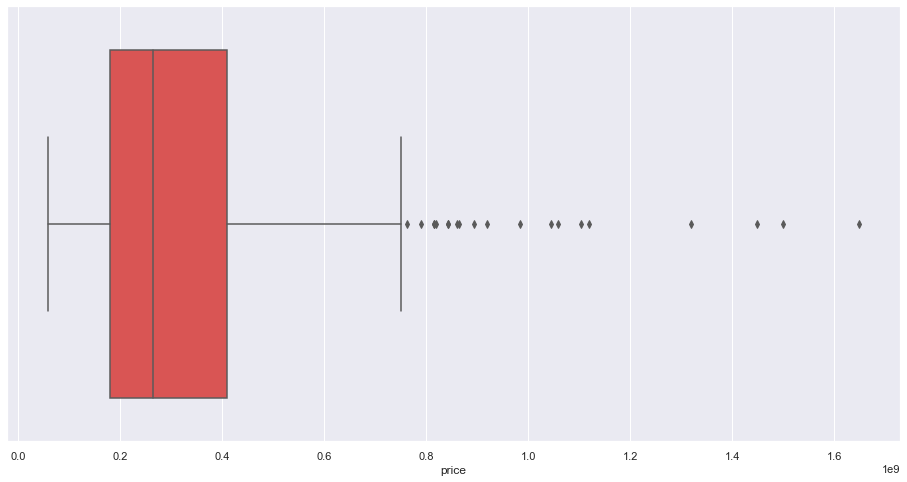

In [256]:
cprint('Min - Meam - Max of laptop prices : ','green')
print('Max Price : ',df['price'].max())
print('Mean Price : ',round(df['price'].mean()))
print('Min Price : ',df['price'].min())
cprint('*'*50,'green')
sns.boxplot(x=df["price"],palette=["#ef3f3e"])

Text(0.5, 1.0, 'Laptops price distribution')

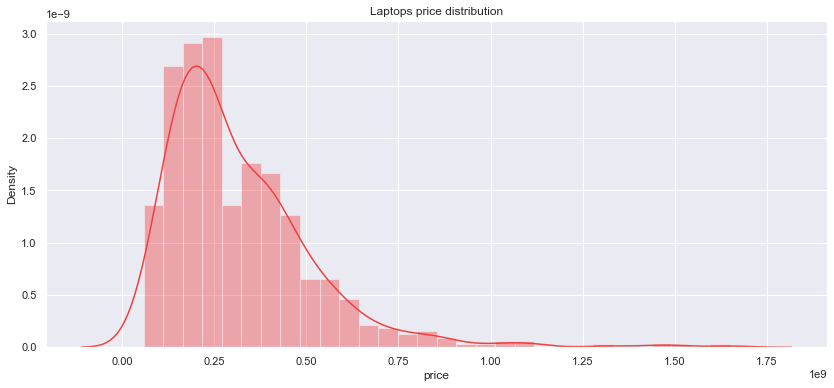

In [257]:
plt.figure(figsize = (14, 6))
sns.distplot(df['price'],color="#ef3f3e")
plt.title('Laptops price distribution',)

### Number of laptops of each brand

Number of each category in brand :
lenovo       211
Asus         209
HP            77
MSI           31
Apple         26
Acer          21
Dell          20
Microsoft      9
Other          5
Name: brand, dtype: int64
**************************************************


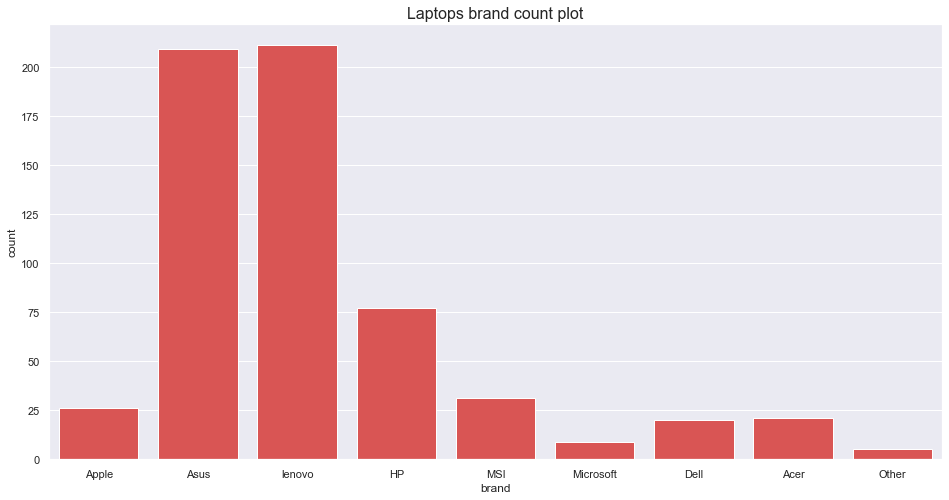

In [258]:
create_plot('brand','Laptops brand count plot')

### Number of cpu of each cpu manufacturer

Number of each category in cpu manufacturer :
Intel     499
AMD        84
Apple      25
FPGA        1
Name: cpu manufacturer, dtype: int64
**************************************************


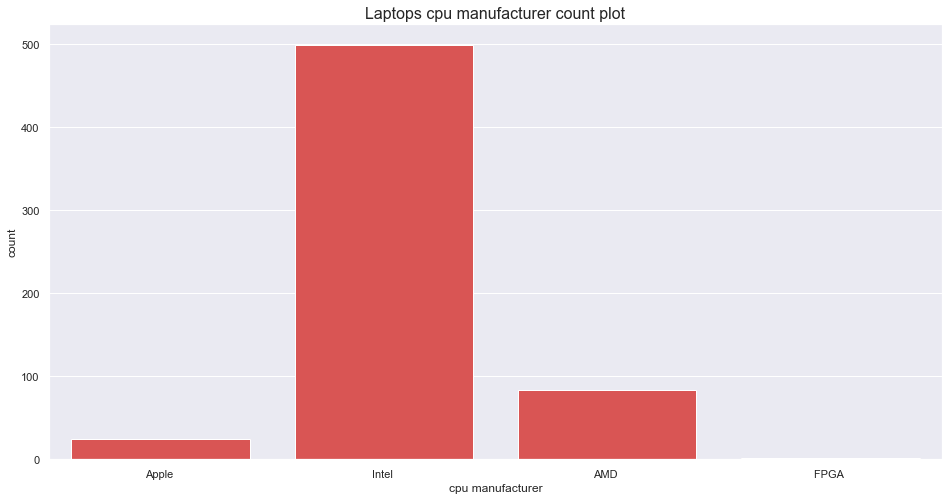

In [259]:
create_plot('cpu manufacturer','Laptops cpu manufacturer count plot')

### Number of laptops for each ram group 

Number of each category in ram :
8 gb     223
16 gb    207
4 gb      75
12 gb     48
32 gb     42
20 gb      7
24 gb      5
64 gb      2
Name: ram, dtype: int64
**************************************************


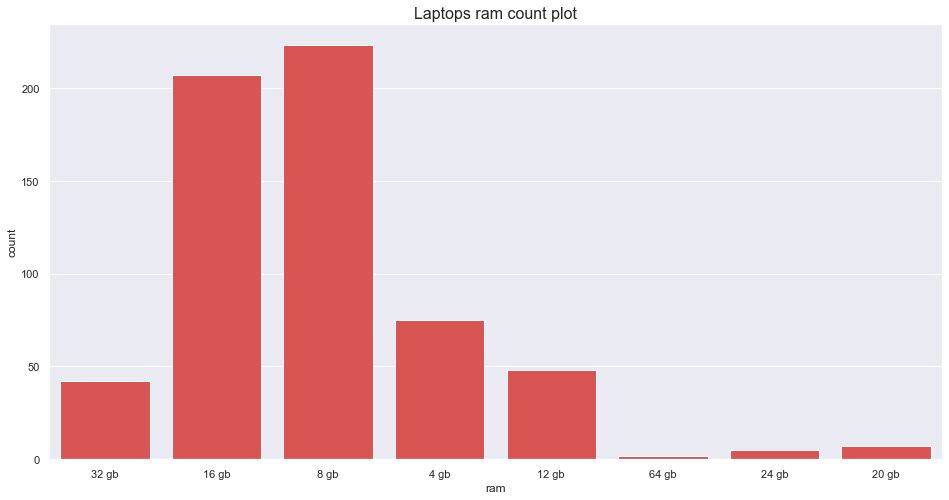

In [260]:
create_plot('ram','Laptops ram count plot')

### Number of laptops for each ram type group

Number of each category in ram type :
DDR4        523
DDR5         52
Unified      23
LPDDR4X       7
LPDDR5        3
DDR3          1
Name: ram type, dtype: int64
**************************************************


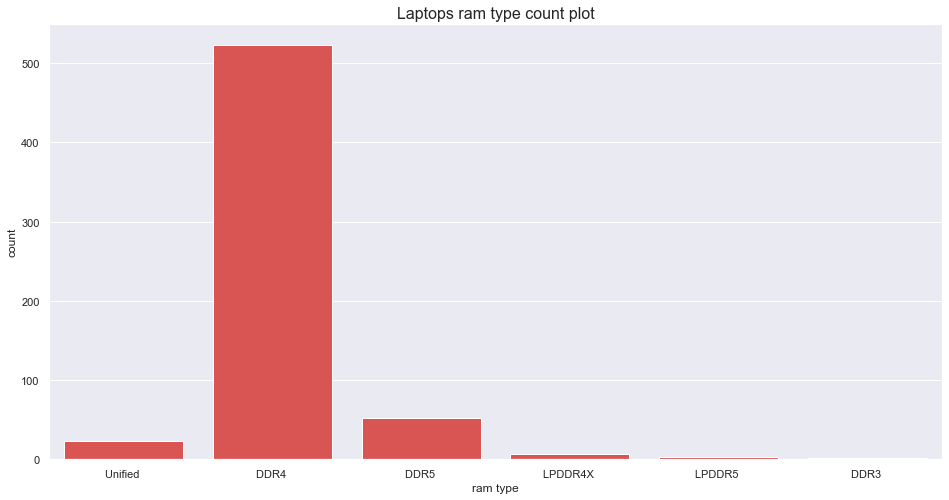

In [261]:
create_plot('ram type','Laptops ram type count plot')

### Number of laptops with diffrent internal storage

Number of each category in internal storage :
1 tb        238
512 gb      188
256 gb       59
1.256 tb     55
1.128 tb     24
2 tb         20
1.512 tb     11
128 gb        9
500 gb        1
1.500 tb      1
1.250 tb      1
1.120 tb      1
250 gb        1
Name: internal storage, dtype: int64
**************************************************


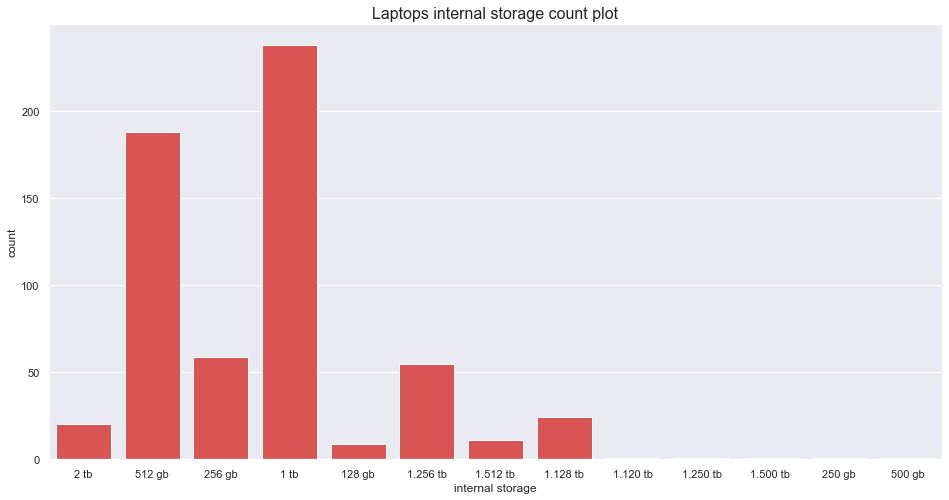

In [262]:
create_plot('internal storage','Laptops internal storage count plot')

### Number of laptops for each internal storage group

Number of each category in internal storage type :
SSD       436
Hybrid    113
HHD        60
Name: internal storage type, dtype: int64
**************************************************


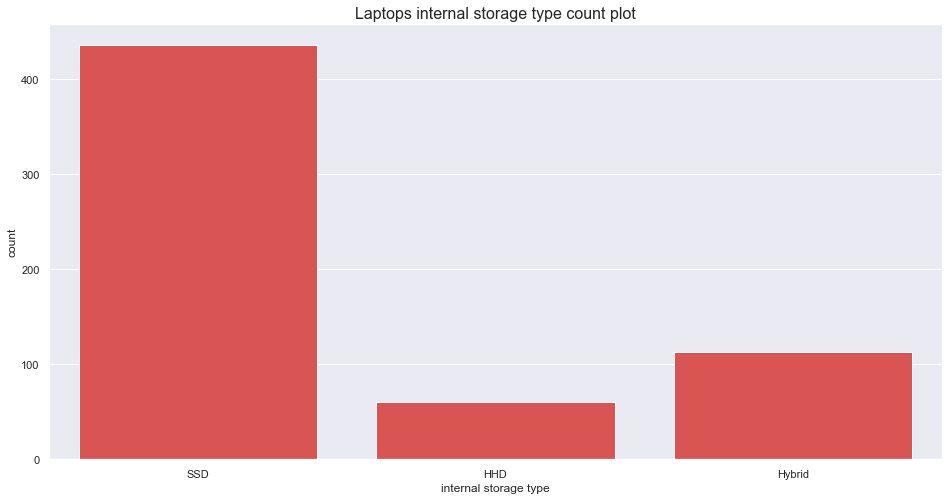

In [263]:
create_plot('internal storage type','Laptops internal storage type count plot')

### Number of laptops with diffrent screen sizes

Number of each category in screen size :
15    423
14     69
13     42
16     34
17     32
11      7
12      2
Name: screen size, dtype: int64
**************************************************


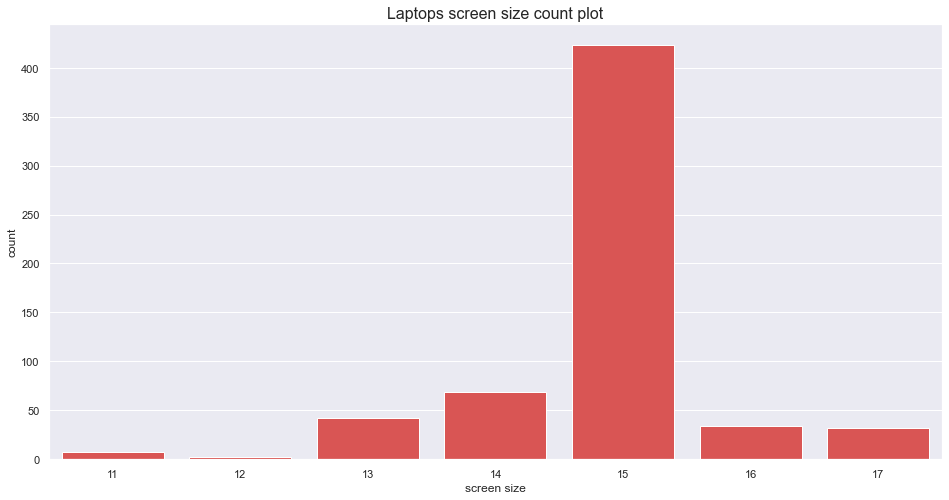

In [264]:
create_plot('screen size','Laptops screen size count plot')

### Number of laptop with diffrent screen resolution 

Number of each category in screen resolution :
1080X1920    361
1920X1080     95
1366X768      54
2560X1600     25
2560X1440     21
768X1366      15
1920X1200      7
2560X1664      6
3024X1964      5
3840X2400      5
2256X1504      4
2880X1800      3
3456X2234      2
1024X1536      2
3000X2000      1
3240X2160      1
2400X1600      1
3840X2160      1
Name: screen resolution, dtype: int64
**************************************************


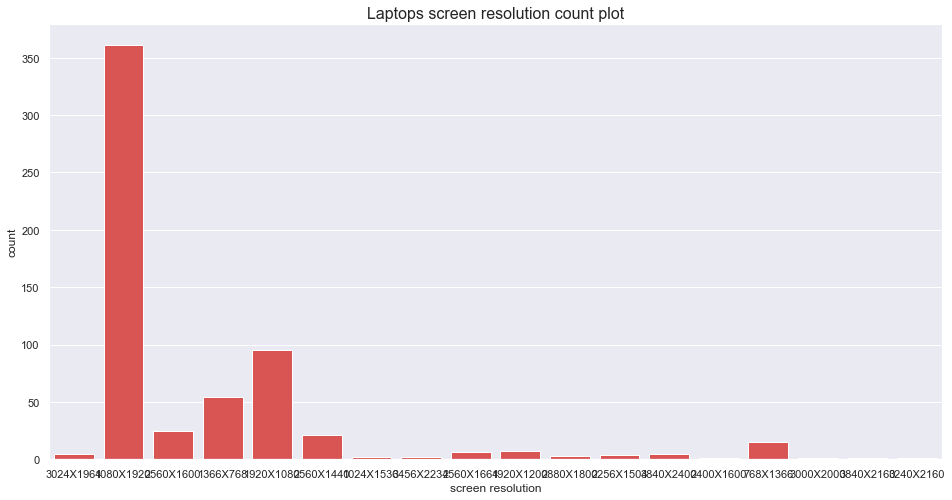

In [265]:
create_plot('screen resolution','Laptops screen resolution count plot')

## 5 - Feature Engineering
- #### Remove outliers base on laptops price using z score
- #### Convert screen resolution to number
- #### Extract Gaming brands from title
- #### Remove brand with only one laptop
- #### Extract clean gpu model from gpu model column
- #### Remove laptops with only less than 3 model gpu
- #### Label endcoding cleand gpu models
- #### Convert internal storage from tb and gb to mg
- #### Label encoding internal storage type
- #### Convert ram from str to int
- #### Extract port count
- #### Label encoding ram type
- #### Label encoding cpu series
- #### One hot encoding brand - cpu manufacturer - gpu manufacturer (nominal categorical variables)

### Remove outliers base on laptops price using z score

Max Price :  1649850000
Mean Price :  318510016
Min Price :  57855000
**************************************************


<AxesSubplot:xlabel='price'>

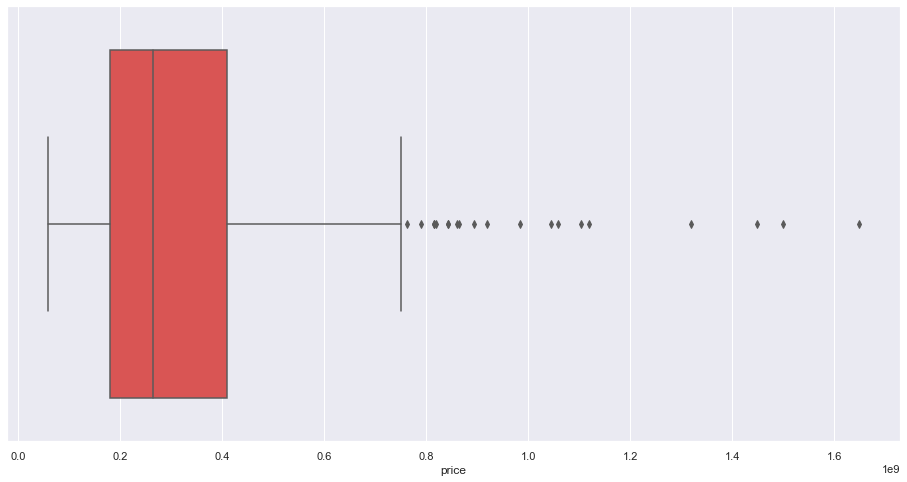

In [266]:
print('Max Price : ',df['price'].max())
print('Mean Price : ',round(df['price'].mean()))
print('Min Price : ',df['price'].min())
cprint('*'*50,'green')
sns.boxplot(x=df["price"],palette=["#ef3f3e"])

In [267]:
df['z_score']=stats.zscore(df['price'])

In [268]:
df = df.loc[df['z_score'].abs()<=3]
df = df.drop('z_score',axis=1)

### Convert screen resolution to number

In [269]:
df['screen resolution']

1      1080X1920
2      2560X1600
3      1080X1920
4      1080X1920
5       1366X768
         ...    
604    1920X1080
605    1920X1080
606    1080X1920
607    1080X1920
608     1366X768
Name: screen resolution, Length: 600, dtype: object

In [270]:
df['screen resolution coverted'] = df['screen resolution'].apply(lambda x : int(x.split('X')[0])*int(x.split('X')[1]))

### Extract Gaming brands from title
Almost Each brand has an gaming sub barand such as asus , acer .... 

***Note : i didn't include Alienware because it's not available for sell in iran***

In [271]:
# Asus   =  rog 
# Asus   =  tuf 
# Acer   =  predator 
# Acer   =  nitro 
# Lenovo =  legion 
# HP     =  Omen
df['brand'] = np.where(df['title_en'].str.contains('ROG'), 'Asus Rog', df['brand'])
df['brand'] = np.where(df['title_en'].str.contains('TUF'), 'Asus Tuf', df['brand'])
df['brand'] = np.where(df['title_en'].str.contains('Predator'), 'Acer Predator', df['brand'])
df['brand'] = np.where(df['title_en'].str.contains('Nitro'), 'Acer Nitro', df['brand'])
df['brand'] = np.where(df['title_en'].str.contains('OMEN'), 'HP Omen', df['brand'])
df['brand'] = np.where(df['title_en'].str.contains('Legion'), 'Lenovo legion', df['brand'])

In [272]:
df['brand'].value_counts()

lenovo           180
Asus             131
HP                62
Asus Tuf          55
Lenovo legion     30
MSI               28
Asus Rog          23
Apple             23
Dell              20
Acer              16
HP Omen           13
Microsoft          9
Other              5
Acer Nitro         4
Acer Predator      1
Name: brand, dtype: int64

### Remove brand with only one laptop

In [273]:
df = df[df['brand'] != 'Other']

### Extract clean gpu model from gpu model column

In [274]:
def extract_gpu(gpu_model):
    """
    This function input uncleand gpu model and output cleand gpu model  
    Parms :
    
    brand : uncleand gpu_model
    
    Returns :
    Converted gpu model  
    """
    gpu_model_name = gpu_model
    if "RTX" in gpu_model :
        gpu_model_name = "RTX "+gpu_model.split('RTX')[1][:5]
    if "GTX" in gpu_model :
        gpu_model_name = "GTX "+gpu_model.split('GTX')[1][:5]
    if "MX" in gpu_model :
        gpu_model_name = "MX "+gpu_model.split('MX')[1][:3]
    if "mx" in gpu_model:
        gpu_model_name = "MX "+gpu_model.split('mx')[1][:3]
    if "IRIS" in gpu_model:
        gpu_model_name = "IRIS "+gpu_model.split('IRIS')[1][:3]
    if "Iris" in gpu_model:
        gpu_model_name = "IRIS "+gpu_model.split('Iris')[1][:3]
    if "Radeon" in gpu_model:
        gpu_model_name = "Radeon "+gpu_model.split('Radeon')[1][:3]
    if "RADEON" in gpu_model:
        gpu_model_name = "Radeon "+gpu_model.split('RADEON')[1][:3]
    if "INTEL" in gpu_model:
        gpu_model_name = "Intel "+gpu_model.split(' ')[1]
    if "Intel" in gpu_model:
        gpu_model_name = "Intel "+gpu_model.split(' ')[1]
    if "intel" in gpu_model:
        gpu_model_name = "Intel "+gpu_model.split(' ')[1]
    if "UHD" in gpu_model or "Intel Intel" in gpu_model :
        gpu_model_name = "Intel UHD"
    if "Irish" in gpu_model :
        gpu_model_name = "Intel Iris"
    if "IRIS" in gpu_model :
        gpu_model_name = "Intel Iris"
    if "Irish" in gpu_model :
        gpu_model_name = "Intel Iris"
    if "Apple" in gpu_model or "GPU with 16-core" in gpu_model or "10 Core" in gpu_model or "M2 10‑core" in gpu_model :
        gpu_model_name="Apple"
    return gpu_model_name

In [275]:
df['gpu model'] = df['gpu model'].apply(lambda x : extract_gpu(x))

In [276]:
df['gpu model'] = df['gpu model'].apply(lambda x : " ".join(x.split()))

In [277]:
df['gpu model'] = df['gpu model'].replace(['IRIS Xe', 'IRIS Xᵉ','Intel Intel','Intel Integrated'], 'Intel Iris')
df['gpu model'] = df['gpu model'].replace(['M2 10‑core', 'GPU with 14-core','10-core','10‑core GPU'], 'Apple')
df['gpu model'] = df['gpu model'].replace(['RTX 3060G'], 'RTX 3060')
df['gpu model'] = df['gpu model'].replace(['GeForce 3050TI GDDR6','GeForce 3050 Ti'], 'RTX 3050')
df['gpu model'] = df['gpu model'].replace(['Intel hd'], 'Intel HD')
df['gpu model'] = df['gpu model'].replace(['MX 35'], 'MX 350')

### Remove laptops with only less than 3 model gpu

In [278]:
df = df.groupby('gpu model').filter(lambda x : len(x)>=2)

### Replace FPGA with Intel cpu manufacturer

In [279]:
df['cpu manufacturer'] = df['cpu manufacturer'].replace(['FPGA '], 'Intel ')

In [280]:
df['brand'].value_counts()

lenovo           176
Asus             129
HP                61
Asus Tuf          55
Lenovo legion     28
MSI               27
Asus Rog          23
Apple             23
Dell              18
Acer              15
HP Omen           13
Microsoft          8
Acer Nitro         4
Acer Predator      1
Name: brand, dtype: int64

In [281]:
df[(df['brand'] == "Apple") & (df["gpu manufacturer"] == "Intel ")]
df = df[df['id'] != 2859385] 

### Label endcoding cleand gpu models 

In [282]:
gpu_dictionary = {'Intel HD':1 , 'Intel UHD':2,'Intel Iris':3,'T500 GDDR6':4,'MX 130':5,'MX 330':6,'MX 350':7,'MX 450':8,'Radeon Ve':9,'Apple':10,'GTX 1650':11,'Radeon RX':12,'Radeon Gr':13,'RTX 3050':14,'RTX 3060':15,'RTX 3070':16,'RTX 3080':17}

df = df.replace({'gpu model':gpu_dictionary})

### Convert internal storage from tb and gb to mg

In [283]:
def convert_bytes(storage):
    """
    This function convert  internal storage size from gb and tb to mg
    Parms : internal storage
    Returns : converted storage to mg
    """
    
    storage = storage.replace(".", "")
    
    # check if unit is tb
    if storage.split(' ')[1] == 'tb':
        storage_size = int(storage.split(' ')[0]) * 1000000
    else : 
        storage_size = int(storage.split(' ')[0]) * 1000
    return storage_size

In [284]:
df['internal storage size'] = df['internal storage'].apply(lambda x : convert_bytes(x))

In [285]:
df['internal storage size'].value_counts()

1000000       226
512000        181
256000         56
1256000000     54
1128000000     24
2000000        15
1512000000     10
128000          9
250000          1
500000          1
1120000000      1
1500000000      1
1250000000      1
Name: internal storage size, dtype: int64

### Label encoding internal storage type

In [286]:
ist_dictionary = {'HHD':1 , 'Hybrid':2, 'SSD':3}

df = df.replace({'internal storage type':ist_dictionary})

In [287]:
df['internal storage type'].unique()

array([3, 1, 2], dtype=int64)

### Convert ram from str to int

In [288]:
df['ram'] = df['ram'].apply(lambda x : int(x.split(' ')[0]))

In [289]:
df['ram'].value_counts()


8     214
16    198
4      75
12     48
32     33
20      6
24      5
64      1
Name: ram, dtype: int64

### Extract port count 

In [290]:
df['ports'] = df['ports'].apply(lambda x : len(x.split(',')))

### Label encoding ram type

In [291]:
ramtype_dictionary = {'DDR3 ':1 , 'LPDDR4X ':2, 'LPDDR4X ':3,'LPDDR5 ':4,'Unified ':5,'DDR4 ':6,'DDR5 ':7}

df = df.replace({'ram type':ramtype_dictionary})

In [292]:
df['ram type'].value_counts()

6    503
7     47
5     20
3      7
4      3
Name: ram type, dtype: int64

### Label encoding cpu series

In [293]:
cpuseries_dictionary = {'Pentium ':1,'A9 ':2,'Ryzen 3 ':3 , 'Celeron ':4, 'ATHLON ':5,'Core i3 ':6,'Core i5 ':7,'Ryzen 5 ':8,'Ryzen 7 ':9,'Core i7 ':10,'Core i9 ':11,'M1 ':12,'Ryzen 9 ':13,'M2 ':14}

df = df.replace({'cpu series':cpuseries_dictionary})

In [294]:
df['cpu series'].value_counts()

10    196
7     142
6      92
9      46
4      39
8      15
14     12
12     10
13      8
3       7
11      7
5       5
1       1
Name: cpu series, dtype: int64

### pick needed columns

In [295]:
df2 = df[['brand','cpu manufacturer', 'cpu series', 'ram', 'ram type', 'internal storage type', 'gpu manufacturer','gpu model', 'screen size', 'screen resolution coverted', 'ports','internal storage size','price']]

In [296]:
df2

,brand,cpu manufacturer,cpu series,ram,ram type,internal storage type,gpu manufacturer,gpu model,screen size,screen resolution coverted,ports,internal storage size,price
1,Asus Tuf,Intel,7,16,6,3,NVIDIA,11,15,2073600,8,512000,267000000
2,Apple,Apple,12,8,5,3,Apple,10,13,4096000,1,256000,335900000
3,Asus,Intel,6,4,6,1,Intel,1,14,2073600,4,1000000,99000000
4,lenovo,Intel,7,8,6,1,NVIDIA,7,15,2073600,2,1000000,165900000
5,lenovo,Intel,4,4,6,3,Intel,2,11,1049088,1,128000,57855000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,lenovo,Intel,6,8,6,2,Intel,2,15,1049088,1,1000000,159000000
605,lenovo,Intel,10,16,6,3,Intel,3,15,2073600,8,500000,542000000
606,Acer,Intel,7,12,6,2,NVIDIA,6,15,2073600,3,1128000000,222000000
607,HP,AMD,8,16,6,3,AMD,12,15,2073600,5,1000000,208000000


In [74]:
df2['gpu manufacturer'].unique()

array(['NVIDIA ', 'Apple ', 'Intel ', 'AMD '], dtype=object)

## One hot encoding brand  - cpu manufacturer - gpu manufacturer

In [75]:
df3 = pd.get_dummies(df2, columns = ['brand','cpu manufacturer','gpu manufacturer',])

### Split dependent and independent features

In [76]:
X = df3.drop('price',axis=1)
y = df3['price']

### Split data into train  and Test

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

## 6 - Feature Selection
- #### Correlation
- #### Mutual information regression

### Correlation

<AxesSubplot:>

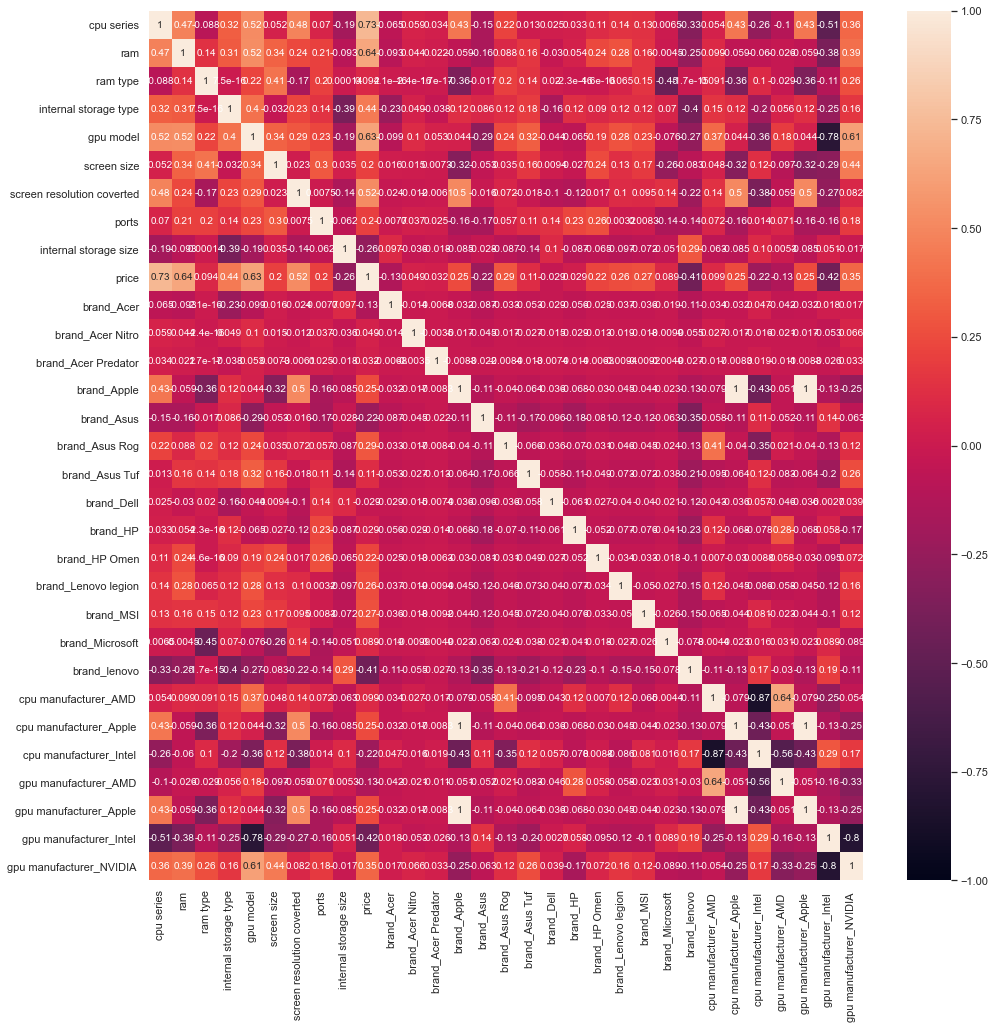

In [78]:
corr= df3.corr()
plt.figure(figsize=(16,16))  
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)

In [79]:
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[25:85]

cpu manufacturer_Apple      cpu manufacturer_Apple        1.000000
                            gpu manufacturer_Apple        1.000000
cpu manufacturer_Intel      cpu manufacturer_Intel        1.000000
gpu manufacturer_AMD        gpu manufacturer_AMD          1.000000
gpu manufacturer_Apple      brand_Apple                   1.000000
                            cpu manufacturer_Apple        1.000000
                            gpu manufacturer_Apple        1.000000
gpu manufacturer_Intel      gpu manufacturer_Intel        1.000000
internal storage type       internal storage type         1.000000
brand_Asus Rog              brand_Asus Rog                1.000000
gpu manufacturer_NVIDIA     gpu manufacturer_NVIDIA       1.000000
ram                         ram                           1.000000
cpu manufacturer_Intel      cpu manufacturer_AMD          0.865912
cpu manufacturer_AMD        cpu manufacturer_Intel        0.865912
gpu manufacturer_NVIDIA     gpu manufacturer_Intel        0.79

### Mutual information regression

In [80]:
mutual_info = mutual_info_regression(X_train, y_train)

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).sort_values(ascending=False)

cpu series                    0.693472
ram                           0.564099
gpu model                     0.491871
screen resolution coverted    0.240176
screen size                   0.231289
gpu manufacturer_Intel        0.227749
gpu manufacturer_NVIDIA       0.224765
ram type                      0.164273
internal storage type         0.151476
brand_lenovo                  0.105388
brand_Asus Tuf                0.082167
internal storage size         0.068815
brand_Asus Rog                0.061910
brand_Asus                    0.060883
gpu manufacturer_AMD          0.056958
ports                         0.054037
brand_Lenovo legion           0.052976
cpu manufacturer_Intel        0.048476
brand_Apple                   0.041169
cpu manufacturer_Apple        0.041169
gpu manufacturer_Apple        0.041169
brand_HP                      0.037118
cpu manufacturer_AMD          0.033027
brand_MSI                     0.030657
brand_Acer                    0.023099
brand_HP Omen            

### Standard Scaling data

In [82]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_sclae  = scaler.transform(X_test) 

## 7 - Model training  

In [83]:
def predict(ml_model):
    """
    This function show result of the regression model by returning  (r2 score,MAE,MSE,RMSE)
    
    Parms : 
    ml_model : regression model
    
    Returns : 
    r2 score,MAE,MSE,RMSE,prediction distplot
    """
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train_scale,y_train)
    print("Training score: {}".format(model.score(X_test_sclae,y_test)))
    predictions = model.predict(X_test_sclae)
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

### RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9198510188672478
r2 score is: 0.9198510188672478
MAE:27922276.36480569
MSE:2227192360393307.5
RMSE:47193138.91227524


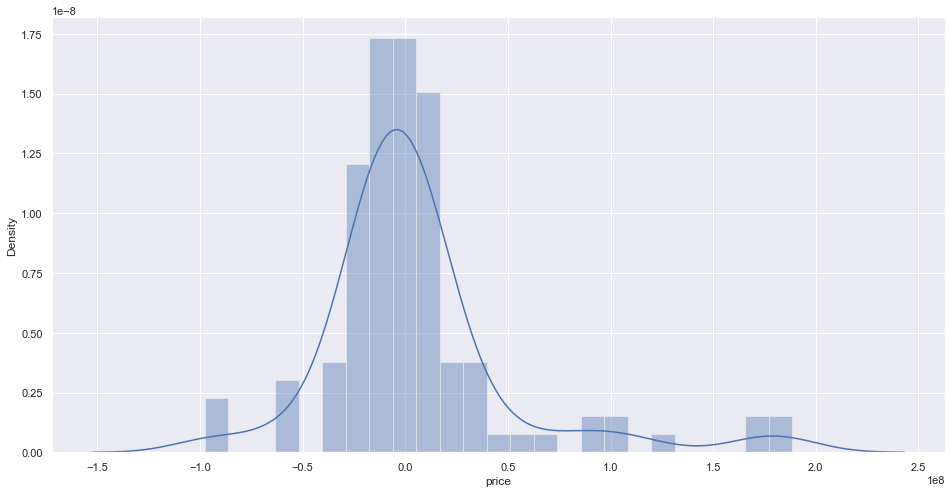

In [84]:
predict(RandomForestRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9083053118583918
r2 score is: 0.9083053118583918
MAE:30933206.896551725
MSE:2548026263482758.5
RMSE:50477978.00509405


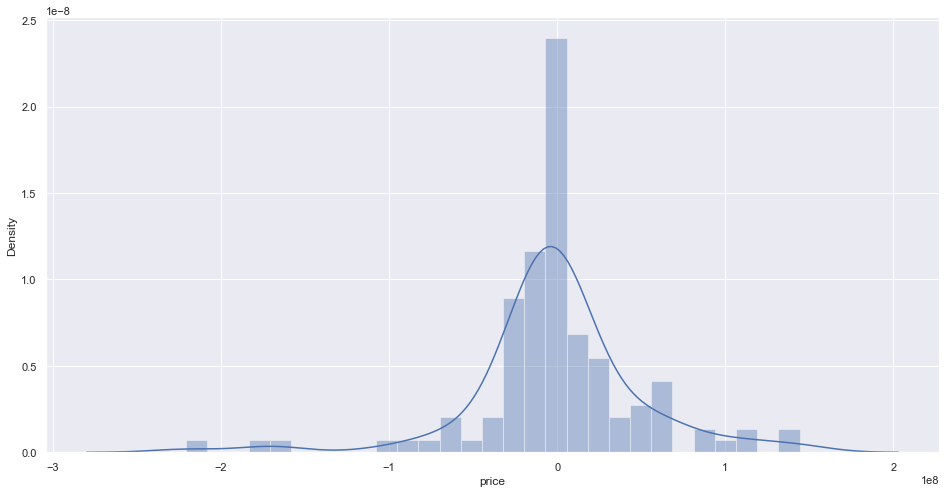

In [85]:
predict(DecisionTreeRegressor())

### LogisticRegression

Model is: LogisticRegression()
Training score: 0.017241379310344827
r2 score is: 0.7700730131884062
MAE:47525034.48275862
MSE:6389246890448276.0
RMSE:79932764.81173584


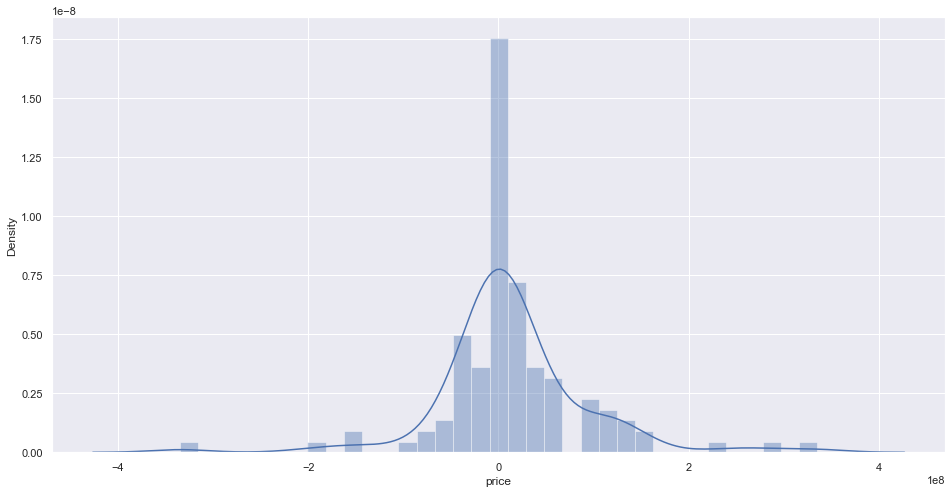

In [86]:
predict(LogisticRegression())

### KNeighborsRegressor

Model is: KNeighborsRegressor()
Training score: 0.7705642251362724
r2 score is: 0.7705642251362724
MAE:49727168.27586207
MSE:6375597016399228.0
RMSE:79847335.68754332


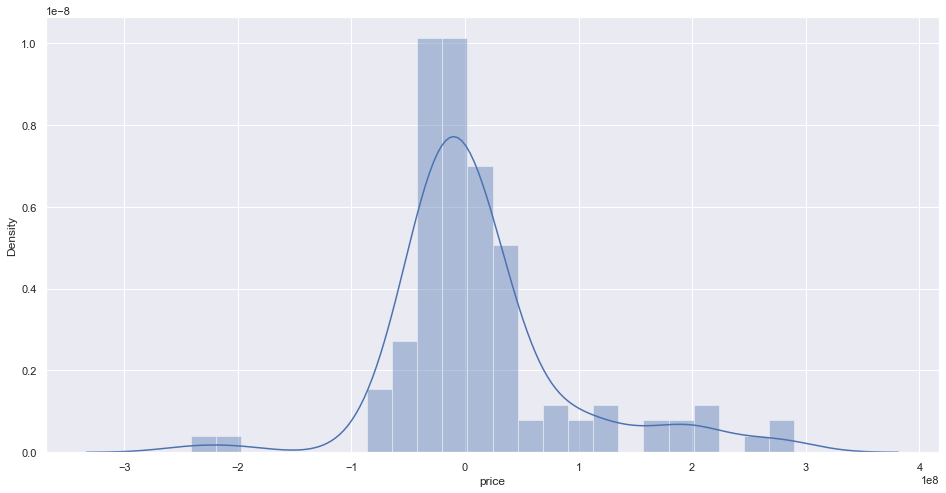

In [87]:
predict(KNeighborsRegressor())


### LinearRegression

Model is: LinearRegression()
Training score: 0.8059729808162668
r2 score is: 0.8059729808162668
MAE:49504041.00011268
MSE:5391653003300722.0
RMSE:73427876.20039628


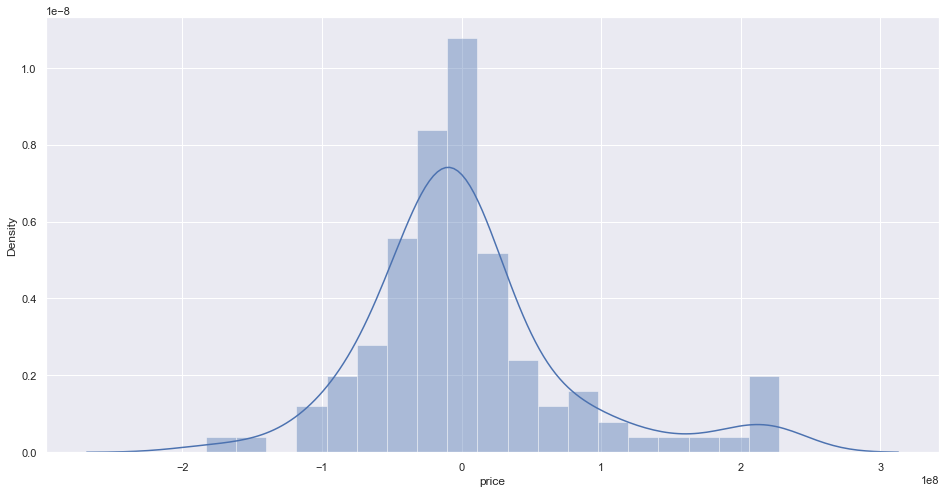

In [88]:
predict(LinearRegression())

### GradientBoostingRegressor

Model is: GradientBoostingRegressor()
Training score: 0.9040614845355412
r2 score is: 0.9040614845355412
MAE:31028155.47353962
MSE:2665954397548816.5
RMSE:51632880.97277564


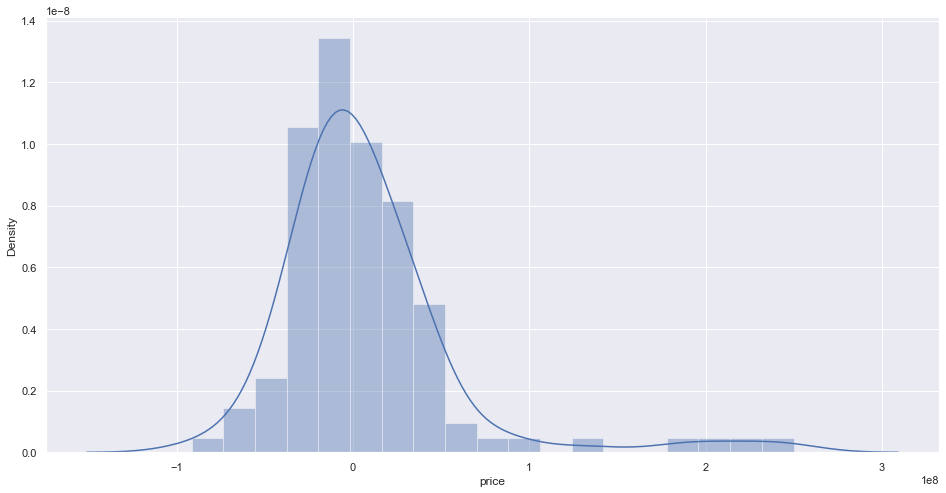

In [89]:
predict(GradientBoostingRegressor())

### XGBoost Regressor

Model is: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Training score: 0.925653908265307
r2 score is: 0.925653908265307
MAE:27086482.103448275
MSE:2065940766762212.5
RMSE:45452621.12092341


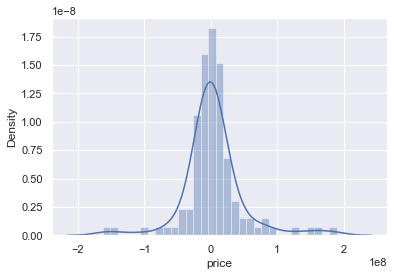

In [113]:
predict(XGBRegressor())

## 8 - Hyperparameter Tuning

In [132]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800,1000,2000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [133]:
xgb=XGBRegressor()
xgb_reg=RandomizedSearchCV(estimator=xgb,param_distributions=hyperparameter_grid)

xgb_reg.fit(X_train_scale,y_train)

# best parameter
xgb_reg.best_params_

{'n_estimators': 2000,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.05}

In [134]:
prediction = xgb_reg.predict(X_test_sclae)

In [135]:
r2_score(y_test,prediction)

0.929392027061609

In [201]:
xgb_reg.predict(X_test_sclae[34].reshape(1,-1))[0]

232188350.0

In [203]:
y_test.iloc[34]

232000000

## 9 - Cross validation

In [207]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(XGBRegressor(n_estimators= 2000,min_child_weight= 1,max_depth= 6,learning_rate= 0.05),X,y,cv=cv)

array([0.94280361, 0.87931006, 0.94521796, 0.94085841, 0.9065963 ])

## 10 - Save model

In [208]:
with open('xgb_reg.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)